# Prediction of abiotic factors: drop_na step

See https://git.bia-christian.de/bia/lab_book_VEO/wiki/abiotic_factors#oxygen-tolerance and https://git.bia-christian.de/bia/lab_book_VEO/wiki/salinity_ML_pipeline#drop_napyipynb

Scripts adapted from https://github.com/ProfHeydeFranca/BacterialData

# Drop_na.py

In [40]:
#Turn off scientific notation
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})

#Activate print all activities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
import pickle
import zstandard
import pandas as pd
import numpy as np
import datetime

print("Started script! Loading input file...", datetime.datetime.now())

#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_salt_kmer9_selected.pickle.zst',
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_salt_gene-families_selected.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_pH_gene-families_selected.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_pH_kmer9_selected.pickle.zst',
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_temperature_gene-families_selected.pickle.zst', 
with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_temperature_kmer9_selected.pickle.zst',
    'rb') as f:
	df = pickle.load(f)

print("Loaded input pickle zst file...", datetime.datetime.now())

Started script! Loading input file... 2024-07-09 11:12:32.172741
Loaded input pickle zst file... 2024-07-09 11:12:47.205298


In [42]:
df.head()
df.shape

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,Temp all min,Temp all max,Temp opt min,Temp opt max,Temp all mean,Temp group
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,53,72,54,82,96,11,52,52,95,46,...,36,54,69,66,37.00,37.00,37.00,37.00,37.00,medium
1006155.5,47,87,88,137,237,80,131,139,229,159,...,161,133,268,324,15.00,34.00,31.00,31.00,24.50,medium
1007092.3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,28.00,28.00,NaN,NaN,28.00,medium
1007099.4,15,27,18,12,17,36,33,8,12,53,...,10,3,7,7,28.00,28.00,NaN,NaN,28.00,medium
1008452.3,14,11,26,39,78,14,41,64,104,62,...,114,108,214,245,37.00,37.00,NaN,NaN,37.00,medium


(13554, 131078)

In [31]:
#Temperature REGRESSION ##################################################################

#Delete un-wanted columns
df = df.drop(['Temp all min', 'Temp opt max', 'Temp all max', 'Temp opt min', 'Temp group'], axis=1)

# Contar quantas linhas possuem NaN na coluna de interesse
nan_count = df['Temp all mean'].isna().sum()

# Imprimir o número de linhas com NaN na coluna de interesse
print("Número de linhas com NaN na coluna de fator abiotico antes de deletar:", nan_count)

Número de linhas com NaN na coluna de fator abiotico antes de deletar: 356


In [32]:
#Temperature REGRESSION #####################################################################

#Drop rows/isolates with NaN in column of interest
df_filtered = df.dropna(subset=['Temp all mean'])
df_filtered.shape

list(set(df_filtered['Temp all mean']))
len(list(set(df_filtered['Temp all mean'])))

df_filtered.head()

(13198, 131073)

[4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 8.5,
 10.0,
 11.0,
 12.0,
 13.5,
 14.5,
 12.5,
 14.0,
 17.0,
 18.5,
 19.0,
 20.5,
 20.0,
 22.5,
 23.5,
 24.5,
 25.0,
 26.5,
 27.0,
 26.0,
 27.5,
 28.0,
 31.5,
 29.0,
 32.5,
 33.5,
 30.0,
 28.5,
 31.0,
 37.0,
 36.0,
 35.0,
 33.0,
 41.0,
 42.5,
 39.5,
 44.0,
 38.5,
 45.0,
 47.0,
 42.0,
 49.0,
 50.0,
 47.5,
 46.5,
 48.5,
 55.0,
 56.0,
 57.5,
 58.5,
 55.5,
 60.5,
 60.0,
 11.5,
 61.5,
 64.0,
 65.0,
 66.0,
 67.5,
 13.0,
 68.0,
 70.0,
 63.5,
 70.5,
 66.5,
 71.0,
 75.0,
 15.0,
 76.0,
 77.5,
 78.0,
 80.0,
 16.25,
 16.0,
 82.5,
 84.0,
 85.0,
 17.5,
 85.5,
 88.0,
 89.0,
 90.0,
 18.0,
 86.5,
 91.5,
 87.5,
 95.0,
 19.5,
 96.5,
 98.0,
 97.0,
 96.0,
 100.0,
 103.0,
 21.0,
 21.5,
 22.0,
 22.25,
 23.0,
 24.0,
 24.25,
 25.5,
 26.25,
 28.75,
 29.5,
 30.5,
 30.75,
 32.0,
 34.0,
 34.5,
 35.5,
 36.5,
 36.25,
 37.5,
 38.0,
 38.75,
 13.4,
 39.0,
 40.0,
 40.5,
 41.5,
 41.25,
 43.0,
 43.5,
 44.5,
 45.5,
 9.5,
 46.0,
 9.0,
 48.0,
 49.5,
 50.75,
 10.5,
 51.0,
 51.5,
 52.5,
 52.0,
 5

171

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTCTCAAA,TTTGAAAAA,TTTGACAAA,TTTGCAAAA,TTTGCCAAA,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,Temp all mean
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,53,72,54,82,96,11,52,52,95,46,...,37,74,49,98,59,36,54,69,66,37.00
1006155.5,47,87,88,137,237,80,131,139,229,159,...,84,314,65,180,75,161,133,268,324,24.50
1007092.3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,28.00
1007099.4,15,27,18,12,17,36,33,8,12,53,...,9,13,2,5,2,10,3,7,7,28.00
1008452.3,14,11,26,39,78,14,41,64,104,62,...,95,248,128,98,59,114,108,214,245,37.00


In [43]:
#Temperature CLASSIFICATION ##################################################################

#Delete un-wanted columns
df = df.drop(['Temp all min', 'Temp opt max', 'Temp all max', 'Temp all mean', 'Temp opt min'], axis=1)

# Contar quantas linhas possuem NaN na coluna de interesse
nan_count = len(df[df['Temp group'] == 'nan'])

# Imprimir o número de linhas com NaN na coluna de interesse
print("Número de linhas com nan na coluna de fator abiotico antes de deletar:", nan_count)

Número de linhas com nan na coluna de fator abiotico antes de deletar: 356


In [44]:
#Temperature CLASSIFICATION ##################################################################

#Drop rows/isolates with 'nan' in column of interest
df_filtered = df.drop(df[df['Temp group'] == 'nan'].index)
df_filtered.shape

list(set(df_filtered['Temp group']))
len(list(set(df_filtered['Temp group'])))

df_filtered.head()

(13198, 131073)

['high', 'low', 'medium']

3

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTCTCAAA,TTTGAAAAA,TTTGACAAA,TTTGCAAAA,TTTGCCAAA,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,Temp group
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,53,72,54,82,96,11,52,52,95,46,...,37,74,49,98,59,36,54,69,66,medium
1006155.5,47,87,88,137,237,80,131,139,229,159,...,84,314,65,180,75,161,133,268,324,medium
1007092.3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,medium
1007099.4,15,27,18,12,17,36,33,8,12,53,...,9,13,2,5,2,10,3,7,7,medium
1008452.3,14,11,26,39,78,14,41,64,104,62,...,95,248,128,98,59,114,108,214,245,medium


In [16]:
#pH REGRESSION ##################################################################

#Delete un-wanted columns
df = df.drop(['pH all min', 'pH opt max', 'pH all max', 'pH opt min'], axis=1)

# Contar quantas linhas possuem NaN na coluna de interesse
nan_count = df['pH all mean'].isna().sum()

# Imprimir o número de linhas com NaN na coluna de interesse
print("Número de linhas com NaN na coluna de fator abiotico antes de deletar:", nan_count)

Número de linhas com NaN na coluna de fator abiotico antes de deletar: 9924


In [17]:
#pH REGRESSION #####################################################################

#Drop rows/isolates with NaN in column of interest
df_filtered = df.dropna(subset=['pH all mean'])
df_filtered.shape

list(set(df_filtered['pH all mean']))
len(list(set(df_filtered['pH all mean'])))

df_filtered.head()

(3630, 131073)

[1.7999999999999998,
 2.25,
 3.0,
 4.0,
 5.7,
 6.55,
 6.0,
 6.75,
 7.0,
 9.6,
 7.5,
 7.25,
 8.0,
 7.1,
 6.5,
 7.75,
 8.5,
 9.1,
 11.0,
 2.0,
 4.5,
 4.25,
 4.75,
 3.75,
 3.25,
 5.25,
 5.5,
 5.75,
 5.0,
 7.800000000000001,
 6.25,
 6.875,
 7.125,
 8.25,
 8.75,
 8.100000000000001,
 8.125,
 9.5,
 9.0,
 9.75,
 9.25,
 9.399999999999999,
 10.75,
 10.0,
 10.25,
 12.0,
 7.6499999999999995,
 4.4,
 4.65,
 4.9,
 5.65,
 5.15,
 5.9,
 6.9,
 6.65,
 6.15,
 6.4,
 7.9,
 7.15,
 7.65,
 7.4,
 8.65,
 8.4,
 8.9,
 8.15,
 9.4,
 4.8,
 5.3,
 5.55,
 5.8,
 5.05,
 6.8,
 6.3,
 6.05,
 7.8,
 7.05,
 7.3,
 7.55,
 5.800000000000001,
 5.949999999999999,
 6.199999999999999,
 6.800000000000001,
 6.050000000000001,
 6.949999999999999,
 6.699999999999999,
 7.550000000000001,
 7.199999999999999,
 7.300000000000001,
 7.050000000000001,
 6.449999999999999,
 8.05,
 8.2,
 8.7,
 8.3,
 7.949999999999999,
 9.2,
 8.95,
 6.925000000000001,
 6.550000000000001,
 7.449999999999999,
 7.699999999999999,
 7.074999999999999,
 3.45,
 5.95,
 5.2,

131

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTCTCAAA,TTTGAAAAA,TTTGACAAA,TTTGCAAAA,TTTGCCAAA,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,pH all mean
Best assembly,,,,,,,,,,,,,,,,,,,,,
1049199.3,3,12,5,8,17,22,27,10,15,19,...,39,50,37,69,95,62,15,12,43,6.75
1051501.5,67,146,161,178,407,229,240,146,412,344,...,132,428,113,187,103,135,154,376,393,5.70
1077675.3,177,210,288,477,432,92,199,231,586,284,...,91,435,105,137,108,195,180,410,372,9.60
1116389.3,42,4,24,2,9,11,4,4,28,10,...,12,12,15,16,45,9,5,0,21,7.00
111802.3,14,1,1,0,0,1,0,0,1,2,...,1,0,1,2,1,0,0,0,0,6.00


In [4]:
#SALINITY CLASSIFICATION ##################################################################

#Delete un-wanted columns
df = df.drop(['Salt all min', 'Salt opt max', 'Salt all max', 'Salt all mean', 'Salt opt min'], axis=1)

# Contar quantas linhas possuem NaN na coluna de interesse
nan_count = len(df[df['Salinity group'] == 'nan'])

# Imprimir o número de linhas com NaN na coluna de interesse
print("Número de linhas com nan na coluna de fator abiotico antes de deletar:", nan_count)

Número de linhas com nan na coluna de fator abiotico antes de deletar: 10136


In [10]:
#SALINITY REGRESSION ######################################################################

#Delete un-wanted columns
df = df.drop(['Salt all min', 'Salt opt max', 'Salt all max', 'Salinity group', 'Salt opt min'], axis=1)

# Contar quantas linhas possuem NaN na coluna de interesse
nan_count = df['Salt all mean'].isna().sum()

# Imprimir o número de linhas com NaN na coluna de interesse
print("Número de linhas com NaN na coluna de fator abiotico antes de deletar:", nan_count)

Número de linhas com NaN na coluna de fator abiotico antes de deletar: 10136


In [88]:
#OXYGEN TOLERANCE #########################################################################

# Contar quantas linhas possuem NaN na coluna de interesse
nan_count = df['Oxygen tolerance'].isna().sum()

# Imprimir o número de linhas com NaN na coluna de interesse
print("Número de linhas com NaN na coluna de fator abiotico antes de deletar:", nan_count)

Número de linhas com NaN na coluna de fator abiotico antes de deletar: 6299


In [89]:
#OXYGEN TOLERANCE #########################################################################

df_filtered = df.dropna(subset=['Oxygen tolerance'])
df_filtered.shape

list(set(df_filtered['Oxygen tolerance']))
len(list(set(df_filtered['Oxygen tolerance'])))

(7255, 131073)

['anaerobe',
 'obligate anaerobe-anaerobe',
 'facultative anaerobe-anaerobe',
 'facultative anaerobe-aerobe-anaerobe',
 'facultative anaerobe-aerobe',
 'microaerophile-facultative anaerobe',
 'facultative anaerobe',
 'facultative aerobe-facultative anaerobe',
 'aerobe',
 'microaerophile',
 'microaerophile-aerotolerant',
 'microaerophile-anaerobe-aerobe-facultative anaerobe',
 'facultative anaerobe-obligate anaerobe-aerobe',
 'facultative aerobe-obligate anaerobe',
 'microaerophile-aerobe-anaerobe',
 'aerobe-anaerobe',
 'facultative anaerobe-facultative aerobe',
 'microaerophile-microaerotolerant',
 'obligate aerobe',
 'anaerobe-aerobe',
 'microaerophile-facultative aerobe-anaerobe',
 'facultative aerobe-anaerobe-aerobe',
 'microaerophile-anaerobe-aerobe',
 'facultative anaerobe-anaerobe-aerobe',
 'facultative aerobe-anaerobe',
 'microaerophile-obligate aerobe',
 'microaerophile-anaerobe-facultative anaerobe',
 'anaerobe-aerotolerant',
 'facultative anaerobe-aerobe-microaerophile',
 'ob

45

In [5]:
#SALINITY CLASSIFICATION ##################################################################

#Drop rows/isolates with 'nan' in column of interest
df_filtered = df.drop(df[df['Salinity group'] == 'nan'].index)
df_filtered.shape

list(set(df_filtered['Salinity group']))
len(list(set(df_filtered['Salinity group'])))

df_filtered.head()

(3418, 131073)

['high', 'medium', 'low']

3

,AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,AAAAAAAAT,AAAAAAACA,AAAAAAACC,AAAAAAACG,AAAAAAACT,AAAAAAAGA,AAAAAAAGC,...,TTTCTCAAA,TTTGAAAAA,TTTGACAAA,TTTGCAAAA,TTTGCCAAA,TTTGGAAAA,TTTGTAAAA,TTTTAAAAA,TTTTCAAAA,Salinity group
Best assembly,,,,,,,,,,,,,,,,,,,,,
1006155.5,47,87,88,137,237,80,131,139,229,159,...,84,314,65,180,75,161,133,268,324,medium
1051501.5,67,146,161,178,407,229,240,146,412,344,...,132,428,113,187,103,135,154,376,393,high
1077675.3,177,210,288,477,432,92,199,231,586,284,...,91,435,105,137,108,195,180,410,372,high
1116389.3,42,4,24,2,9,11,4,4,28,10,...,12,12,15,16,45,9,5,0,21,medium
111802.3,14,1,1,0,0,1,0,0,1,2,...,1,0,1,2,1,0,0,0,0,medium


In [11]:
#SALINITY REGRESSION #####################################################################

#Drop rows/isolates with NaN in column of interest
df_filtered = df.dropna(subset=['Salt all mean'])
df_filtered.shape

list(set(df_filtered['Salt all mean']))
len(list(set(df_filtered['Salt all mean'])))

df_filtered.head()

(3418, 20142)

[0.0,
 1.0,
 2.5,
 2.0,
 4.0,
 5.0,
 6.0,
 7.5,
 2.3376,
 9.5,
 10.0,
 11.0,
 12.5,
 9.0,
 13.5,
 15.0,
 3.75,
 17.5,
 3.0,
 19.0,
 20.0,
 20.454,
 22.5,
 18.0,
 24.837,
 25.0,
 25.1,
 27.5,
 26.9,
 29.0,
 30.0,
 30.65,
 32.5,
 31.0,
 29.22,
 35.0,
 6.5,
 37.5,
 31.25,
 39.0,
 40.0,
 41.0,
 42.5,
 43.5,
 7.0,
 45.0,
 45.5,
 47.5,
 8.0,
 49.0,
 50.0,
 50.25,
 52.5,
 50.5,
 50.15,
 55.0,
 51.5,
 57.5,
 58.44,
 59.0,
 60.0,
 61.361999999999995,
 62.5,
 60.5,
 64.0,
 65.0,
 59.5,
 67.5,
 59.55,
 69.0,
 70.0,
 14.0,
 72.5,
 70.128,
 74.0,
 75.0,
 75.5,
 77.5,
 15.954120000000003,
 79.0,
 80.0,
 16.0,
 82.5,
 3.5,
 83.0,
 85.0,
 86.0,
 17.75,
 87.5,
 89.0,
 90.0,
 18.75,
 92.8,
 18.5,
 92.5,
 95.0,
 90.58200000000001,
 97.5,
 21.5,
 99.0,
 100.0,
 101.25,
 102.5,
 100.015,
 104.60759999999999,
 105.0,
 21.0,
 2.9,
 107.5,
 109.0,
 110.0,
 22.0,
 112.5,
 22.75,
 22.65,
 115.0,
 23.0,
 23.5,
 116.88,
 119.0,
 120.0,
 121.0,
 24.0,
 24.837000000000003,
 125.0,
 25.5,
 127.5,
 130.0,
 26.5,
 132

242

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,arCOG06650@2157,"Viruses,4R0IQ@35237",arCOG09713@2157,arCOG07735@2157,arCOG07334@2157,arCOG04203@2157,arCOG01811@2157,arCOG00087@2157,arCOG07496@2157,Salt all mean
Best assembly,,,,,,,,,,,,,,,,,,,,,
1121349.4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.00
1121909.4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45.00
1123508.3,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
1218801.3,1,1,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,27.50
1420583.3,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.00


In [90]:
#OXYGEN TOLERANCE #########################################################################

#Sub-groups of oxygen tolerance will be clustered into larger groups 
#Details: https://git.bia-christian.de/bia/lab_book_VEO/wiki/Heyde#oxygen
#Replacing: https://note.nkmk.me/en/python-pandas-replace/

#AEROBES
df_filtered = df_filtered.replace({'Oxygen tolerance': ['aerobe', 'obligate aerobe', 'obligate aerobe-aerobe']}, 'aerobe')

#ANAEROBES
df_filtered = df_filtered.replace({'Oxygen tolerance': ['anaerobe', 'obligate anaerobe-anaerobe', 'obligate anaerobe']}, 'anaerobe')

#FACULTATIVES
df_filtered = df_filtered.replace({'Oxygen tolerance': ['anaerobe-aerobe', 'facultative anaerobe-aerobe', 'microaerophile', 
                                                        'microaerophile-aerobe', 'microaerophile-anaerobe', 
                                                        'microaerophile-anaerobe-aerobe', 'facultative anaerobe-anaerobe',
                                                       'facultative anaerobe-aerobe-anaerobe', 'microaerophile-facultative anaerobe',
                                                       'facultative anaerobe', 'facultative aerobe-facultative anaerobe',
                                                        'microaerophile-aerotolerant', 'microaerophile-anaerobe-aerobe-facultative anaerobe',
                                                        'facultative anaerobe-obligate anaerobe-aerobe', 
                                                        'facultative aerobe-obligate anaerobe', 'microaerophile-aerobe-anaerobe',
                                                        'aerobe-anaerobe', 'facultative anaerobe-facultative aerobe',
                                                        'microaerophile-microaerotolerant', 'facultative', 
                                                        'microaerophile-facultative aerobe-anaerobe', 
                                                        'facultative aerobe-anaerobe-aerobe', 'facultative anaerobe-anaerobe-aerobe', 
                                                        'facultative aerobe-anaerobe', 'microaerophile-obligate aerobe', 
                                                        'microaerophile-anaerobe-facultative anaerobe', 'anaerobe-aerotolerant',
                                                        'facultative anaerobe-aerobe-microaerophile', 
                                                        'facultative anaerobe-anaerobe-microaerophile', 
                                                        'microaerophile-aerobe-facultative anaerobe', 
                                                        'microaerophile-facultative anaerobe-aerobe', 'facultative aerobe', 
                                                        'microaerophile-obligate aerobe-facultative anaerobe', 'anaerobe-microaerotolerant',
                                                        'aerotolerant', 'facultative aerobe-aerobe', 'facultative anaerobe-microaerophile', 
                                                        'microaerophile-facultative anaerobe-anaerobe', 'microaerophile-facultative aerobe', 
                                                        'microaerophile-facultative aerobe-facultative anaerobe'
                                                       ]}, 'facultative')

In [91]:
#OXYGEN TOLERANCE #########################################################################

list(set(df_filtered['Oxygen tolerance']))
len(list(set(df_filtered['Oxygen tolerance'])))

df_filtered.shape

['anaerobe', 'aerobe', 'facultative']

3

(7255, 131073)

In [45]:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_salt_kmer9Regression_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_salt_kmer9Classification_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_salt_gene-familiesRegression_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_salt_gene-familiesClassification_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_pH_gene-familiesRegression_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_pH_kmer9Regression_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_temperature_kmer9Regression_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_temperature_kmer9Classification_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_temperature_gene-familiesRegression_selected-filterNA.pickle.zst', 'wb') as f:
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_temperature_gene-familiesClassification_selected-filterNA.pickle.zst', 'wb') as f:
    pickle.dump(df_filtered, f)

# Salvar o DataFrame filtrado como um arquivo CSV
print("Saved selected data in output file",  datetime.datetime.now())

Saved selected data in output file 2024-07-09 11:14:51.521178


# PCA_groups_Filtered.py

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
import pickle
import zstandard
import time
from datetime import datetime

ts = time.time() 
print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected-filterNA.pickle.zst', 
#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 
                    'rb') as f:
	df = pickle.load(f)

ts = time.time() 
print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

/tmp/ipykernel_6279/574650394.py:7: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


Started script! Loading input file... 2024-06-24 08:41:30
Loaded input pickle zst file... 2024-06-24 08:41:38


/tmp/ipykernel_6279/574650394.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


In [4]:
df.head()
df.shape

(7255, 131073)

In [5]:
X = df.iloc[:, :-1]  # Todas as colunas exceto a última
y = df.iloc[:, -1]   # Última coluna

In [6]:
y.isnull().any() #Check if any value is null
X.isnull().any().any()
list(set(y))

['anaerobe', 'facultative', 'aerobe']

In [16]:
#CONSIDERATIONS
#ONLY FOR GENE FAMILIES

# Mapear as classes para valores numéricos
class_mapping = {'anaerobe': 0, 'facultative': 1, 'aerobe': 2}

y_mapped = y.map(class_mapping)

print(y_mapped.head(2))

Best assembly
1002367.3    0
108980.91    2
Name: Oxygen tolerance, dtype: int64


In [7]:
#CONSIDERATIONS: since Gene Families is binary, this step can be skipped. The data is already scaled
#ONLY FOR KMERS

# Mapear as classes para valores numéricos
class_mapping = {'anaerobe': 0, 'facultative': 1, 'aerobe': 2}

y_mapped = y.map(class_mapping)

print(y_mapped.head(2))

#ChatGPT:
#StandardScaler is imported from sklearn.preprocessing.
# scaler is an instance of StandardScaler, which standardizes features by removing the mean and scaling to unit variance. 
# This ensures that each feature contributes equally to the analysis.
# The result, X_scaled, is a scaled version of X where each feature has been standardized
#Scaling is a standardization (transforming data to have a mean of 0 and a standard deviation of 1) or normalization 
# (scaling data to a [0, 1] range)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Best assembly
1002367.3    0
1006155.5    0
Name: Oxygen tolerance, dtype: int64


In [8]:
X_scaled

array([[-0.00920548, -0.01380367, -0.27076463, ..., -0.31742632,
        -0.47336452, -0.52505095],
       [-0.062627  ,  0.14098095,  0.052449  , ...,  0.34313562,
         0.15131913,  0.70508498],
       [-0.35644531, -0.64326116, -0.53694056, ...,  0.13409703,
        -0.01819301,  0.32841545],
       ...,
       [-0.4810955 , -0.71549398, -0.78410393, ..., -0.74386505,
        -0.68054603, -0.76821735],
       [ 0.32913075,  0.76011946,  1.06011503, ...,  0.78629743,
         0.49348254,  0.60018966],
       [-0.08043417, -0.07571752, -0.18520808, ..., -0.66024961,
        -0.63032021, -0.65855407]])

In [9]:
#######################
#CHANGE FOR KMERS BELOW
#######################

# Criar um grid para testar diferentes números de componentes principais
num_components_range = np.arange(1, 1001, 50)

# Lista para armazenar a variância explicada
explained_variance_ratios = []

# Loop sobre diferentes números de componentes principais
for n_components in num_components_range:
    
    # Initialize PCA with the current number of components
    pca = PCA(n_components=n_components)

    # Fit the PCA model to the data and transform the data to principal component space
    #X_pca = pca.fit_transform(X)
    X_pca = pca.fit_transform(X_scaled)

    # Sum the explained variance ratios of the selected components and append to the list
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

In [10]:
num_components_range

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])

In [11]:
importancia_variaveis = pd.DataFrame(explained_variance_ratios, columns=['Importancia'])
# Salvar importância das variáveis em um arquivo CSV
#importancia_variaveis.to_csv('/home/wi38kap/BacterialData/importancia_variaveis_filtered.csv', index=False)

#importancia_variaveis

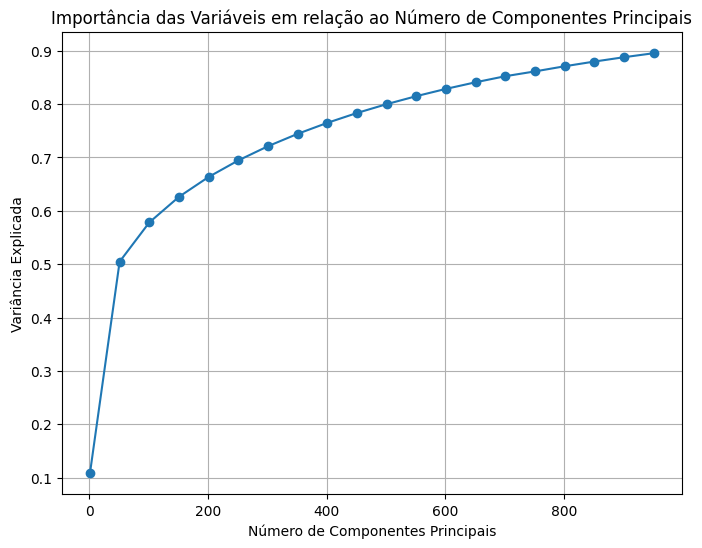

In [14]:
#Gene Families
# Plotar gráfico de importância das variáveis
plt.figure(figsize=(8, 6));
plt.plot(num_components_range, explained_variance_ratios, marker='o');
plt.xlabel('Número de Componentes Principais');
plt.ylabel('Variância Explicada');
plt.title('Importância das Variáveis em relação ao Número de Componentes Principais');
plt.grid(True);
#plt.savefig('/home/bia/Documents/BacterialData/oxygen/figures/importancia_variaveis_filtered_oxigen_gene-families.png')  # Salvar o gráfico como imagem
plt.show();

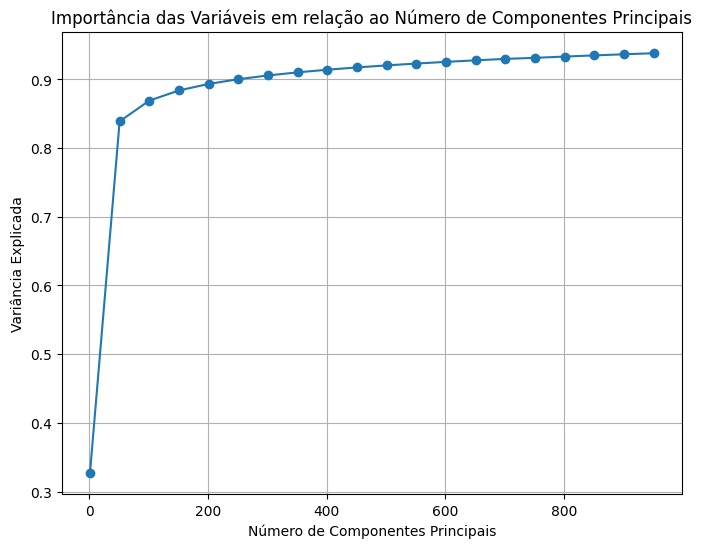

In [11]:
#kmers
# Plotar gráfico de importância das variáveis
plt.figure(figsize=(8, 6));
plt.plot(num_components_range, explained_variance_ratios, marker='o');
plt.xlabel('Número de Componentes Principais');
plt.ylabel('Variância Explicada');
plt.title('Importância das Variáveis em relação ao Número de Componentes Principais');
plt.grid(True);
#plt.savefig('/home/bia/Documents/BacterialData/oxygen/figures/importancia_variaveis_filtered_oxigen_kmer9.png')  # Salvar o gráfico como imagem
plt.show();

In [104]:
resultado_pca = pd.DataFrame(X_pca, columns=[f'Componente Principal {i+1}' for i in range(X_pca.shape[1])])
resultado_pca
# Salvar os resultados do PCA em um arquivo CSV
#resultado_pca.to_csv('/home/wi38kap/BacterialData/resultado_pcafiltered.csv', index=False)

,Componente Principal 1,Componente Principal 2,Componente Principal 3,Componente Principal 4,Componente Principal 5,Componente Principal 6,Componente Principal 7,Componente Principal 8,Componente Principal 9,Componente Principal 10,...,Componente Principal 942,Componente Principal 943,Componente Principal 944,Componente Principal 945,Componente Principal 946,Componente Principal 947,Componente Principal 948,Componente Principal 949,Componente Principal 950,Componente Principal 951
0,-7721.35,-3230.67,-2166.17,573.40,-1593.27,-857.70,143.01,-904.78,345.14,738.79,...,-40.45,9.93,-22.26,15.71,12.08,76.55,36.43,23.67,25.64,-26.78
1,-10989.15,675.05,-56.04,816.67,-1029.61,1.15,1128.09,1113.71,-71.30,-361.66,...,4.81,-51.41,8.52,87.68,9.45,74.03,-15.91,13.61,69.73,-72.11
2,-11277.37,-1730.76,-3831.87,79.02,429.11,-128.92,925.62,745.72,300.27,638.81,...,-1.86,7.70,9.19,-0.58,23.59,8.46,9.82,-10.01,-0.62,-25.54
3,-10618.16,-3197.19,-4628.85,504.58,861.09,-599.53,1035.57,943.39,-116.15,194.46,...,38.50,-37.96,67.41,-8.14,-0.57,-16.10,-22.65,-22.15,22.02,11.04
4,-11541.99,-1275.70,-3931.45,356.72,776.78,-607.69,1184.98,1219.11,94.50,-173.91,...,-31.48,-31.66,-17.04,-9.08,-2.72,-28.32,-20.05,8.67,16.14,-22.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,-1120.97,-3884.28,5530.11,-2950.47,-1638.53,-1866.40,1619.58,-692.58,-1154.73,58.82,...,6.44,-26.09,-24.78,22.09,12.15,-19.36,-44.33,26.04,-2.83,-27.07
7251,-11128.98,1037.18,1034.81,-951.60,-1790.78,1507.78,269.79,-390.30,858.21,3996.14,...,-10.03,37.32,-15.63,32.96,33.86,-115.55,61.57,-82.42,-40.28,-11.77
7252,107.19,-6477.30,-73.22,1838.04,-213.54,505.59,-1488.11,959.93,-1628.74,-408.99,...,25.88,-2.25,15.76,3.50,6.32,12.87,-0.62,-4.12,-5.61,19.52
7253,-12702.17,3937.35,957.94,475.31,-812.83,453.77,780.01,313.21,632.08,538.01,...,-10.85,-115.05,-44.18,-17.88,1.95,-28.07,32.13,24.55,15.01,13.98


/tmp/ipykernel_11907/3400282937.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5);


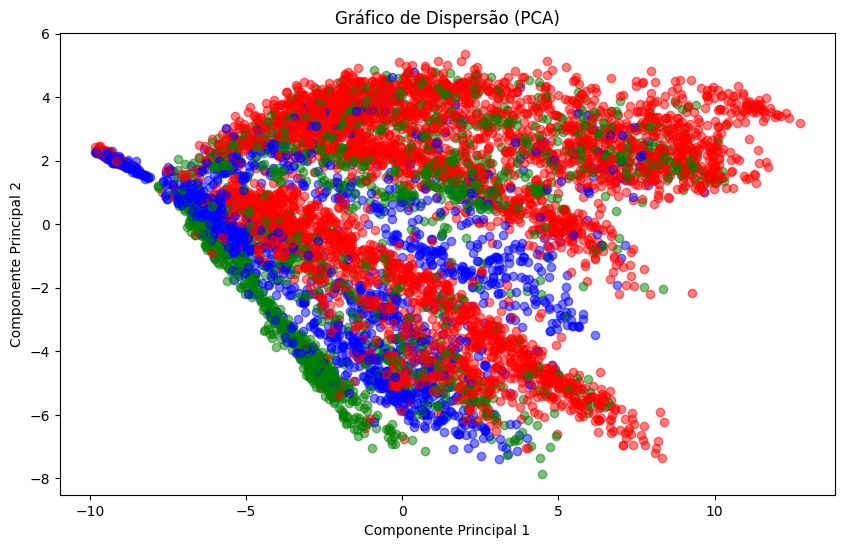

In [17]:
#Gene families
# Plotar gráfico de visualização dos dados
# Mapear cores para as classes 'low', 'medium' e 'high'
colors = {0: 'blue', 1: 'green', 2: 'red'}
#class_mapping = {'anaerobe': 0, 'facultative': 1, 'aerobe': 2}

# Plotar o gráfico de dispersão com as cores mapeadas
plt.figure(figsize=(10, 6));
for i in range(len(X_pca)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5);
plt.title("Gráfico de Dispersão (PCA)");
plt.xlabel("Componente Principal 1");
plt.ylabel("Componente Principal 2");
#plt.savefig('scatter_plot_PCA.png')

plt.show();

/tmp/ipykernel_11907/3681375439.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5);


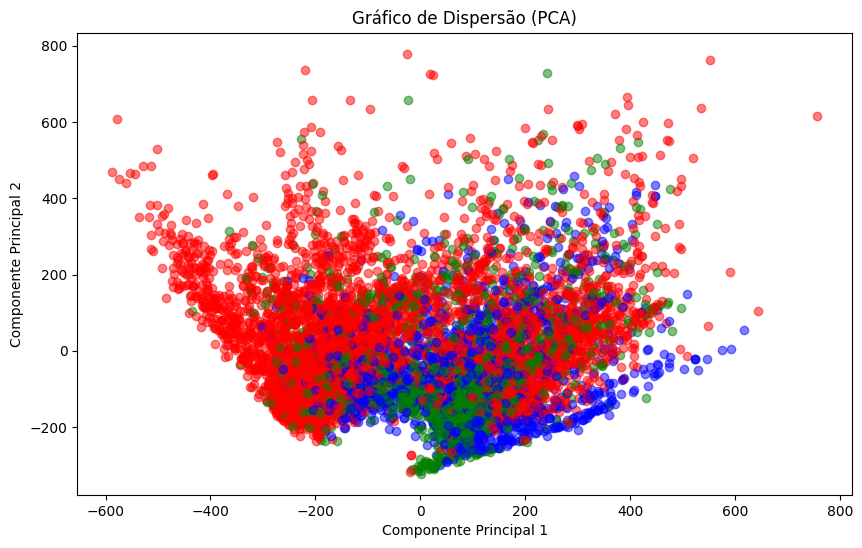

In [29]:
#kmers
# Plotar gráfico de visualização dos dados
# Mapear cores para as classes 'low', 'medium' e 'high'
colors = {0: 'blue', 1: 'green', 2: 'red'}
#class_mapping = {'anaerobe': 0, 'facultative': 1, 'aerobe': 2}

# Plotar o gráfico de dispersão com as cores mapeadas
plt.figure(figsize=(10, 6));
for i in range(len(X_pca)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[y_mapped[i]], alpha=0.5);
plt.title("Gráfico de Dispersão (PCA)");
plt.xlabel("Componente Principal 1");
plt.ylabel("Componente Principal 2");
plt.savefig('figures/scatter_plot_PCA_oxygen_kmer9.png')

plt.show();

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Matriz de Covariância')

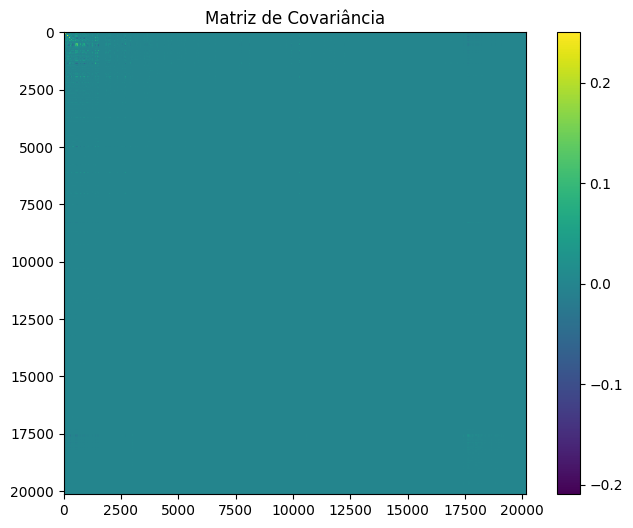

In [83]:
#Gene families
# Plotar matriz de covariância
covariance_matrix = np.cov(X.T)
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Covariância')
#plt.savefig('/home/wi38kap/BacterialData/matriz_covarianciafiltered.png')  # Salvar a matriz de covariância como imagem
#plt.savefig(r'C:\Users\00pau\matriz_covariancia.png') 
plt.show()

In [106]:
#kmers
# Plotar matriz de covariância
covariance_matrix = np.cov(X.T)
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Covariância')
#plt.savefig('/home/wi38kap/BacterialData/matriz_covarianciafiltered.png')  # Salvar a matriz de covariância como imagem
#plt.savefig(r'C:\Users\00pau\matriz_covariancia.png') 
plt.show()

MemoryError: Unable to allocate 128. GiB for an array with shape (131072, 131072) and data type float64

# Silhouette analysis

See https://git.bia-christian.de/bia/lab_book_VEO/wiki/abiotic_factors#silhouette

In [8]:
#Turn off scientific notation
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})

#Activate print all activities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd

In [10]:
import pickle
import zstandard
import time
from datetime import datetime

ts = time.time() 
print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

#with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_kmer9_selected-filterNA.pickle.zst', 
with zstandard.open('/home/bia/Documents/bacterial_phenotypes/connecting_features_abFactors/df_oxygen_gene-families_selected-filterNA.pickle.zst', 
                    'rb') as f:
	df = pickle.load(f)

ts = time.time() 
print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

/tmp/ipykernel_5249/3906458195.py:7: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Started script! Loading input file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


Started script! Loading input file... 2024-06-20 14:12:38
Loaded input pickle zst file... 2024-06-20 14:12:38


/tmp/ipykernel_5249/3906458195.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  print("Loaded input pickle zst file...", datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))


In [11]:
X = df.iloc[:, :-1]  #Features
y = df.iloc[:, -1]   #Groups

X
y

,COG3696@2,COG0606@2,33SZW@2,COG0774@1,COG5009@2,COG0188@2,COG0265@2,COG3270@1,2Z7XP@2,COG1086@2,...,arCOG09517@2157,arCOG06650@2157,"Viruses,4R0IQ@35237",arCOG09713@2157,arCOG07735@2157,arCOG07334@2157,arCOG04203@2157,arCOG01811@2157,arCOG00087@2157,arCOG07496@2157
Best assembly,,,,,,,,,,,,,,,,,,,,,
1002367.3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
108980.91,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111140.3,1,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1112212.3,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120962.3,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_009729035.1_ASM972903v1_genomic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GCA_000591035.1_ASM59103v1_genomic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
GCA_001316325.1_ASM131632v1_genomic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Best assembly
1002367.3                              anaerobe
108980.91                                aerobe
1111140.3                                aerobe
1112212.3                                aerobe
1120962.3                                aerobe
                                         ...   
GCA_009729035.1_ASM972903v1_genomic    anaerobe
GCA_000591035.1_ASM59103v1_genomic       aerobe
GCA_001316325.1_ASM131632v1_genomic    anaerobe
GCA_001462395.1_ASM146239v1_genomic    anaerobe
GCA_001412615.1_ASM141261v1_genomic    anaerobe
Name: Oxygen tolerance, Length: 7255, dtype: object

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.fit_predict(X))

0.1078041926569748

In [14]:
silhouette_score(X, y, metric='euclidean')

-0.008806675036263575